## Working with Time Series in Pandas

This chapter lays the foundations to leverage the powerful time series functionality made available by how Pandas represents dates, in particular by the DateTimeIndex. You will learn how to create and manipulate date information and time series, and how to do calculations with time-aware DataFrames to shift your data in time or create period-specific returns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Your first time series

You have learned in the video how to create a sequence of dates using `pd.date_range()`. You have also seen that each date in the resulting `pd.DatetimeIndex` is a `pd.Timestamp` with various attributes that you can access to obtain information about the date.

Now, you'll create a week of data, iterate over the result, and obtain the `dayofweek` and `weekday_name` for each date.

In [4]:
# Create the range of dates here
# Use pd.date_range to create seven dates starting from '2017-1-1' at (default) daily frequency. 
# Use the arguments start and periods. Assign the result to seven_days.
seven_days = pd.date_range(start='2017-1-1', periods=7)

# Iterate over the dates and print the number and name of the weekday
# Iterate over each date in seven_days and in each iteration, print 
# the .dayofweek and .weekday_name attributes.

for day in seven_days:
    print(day.dayofweek, day.weekday_name)


6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


C:\Users\Jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


### Create a time series of air quality data

You have seen in the video how to deal with dates that are not in the correct format, but instead are provided as `string` types, represented as `dtype` `object` in `pandas`.

We have prepared a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017) for you to practice the use of `pd.to_datetime()`.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3)
memory usage: 197.4 KB
None


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C880F2A080>,
      dtype=object)

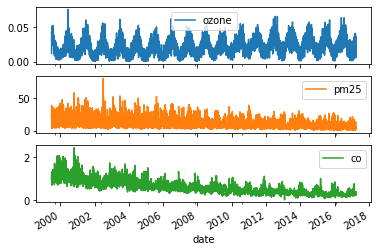

In [7]:
data = pd.read_csv('nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data['date'] = pd.to_datetime(data['date'])

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)

### Compare annual stock price trends

In the video, you have seen how to select sub-periods from a time series.

You'll use this to compare the performance for three years of Yahoo stock prices.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2013-01-02 to 2015-12-31
Data columns (total 1 columns):
price    756 non-null float64
dtypes: float64(1)
memory usage: 12.2 KB
None


,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
2013    252 non-null float64
2014    252 non-null float64
2015    252 non-null float64
dtypes: float64(3)
memory usage: 6.2 KB
None


,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59


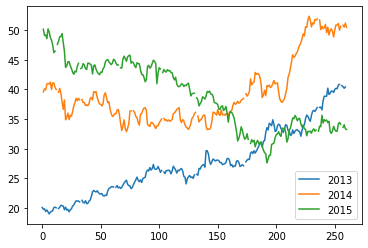

In [10]:
yahoo = pd.read_csv('yahoo.csv', parse_dates=['date'], index_col='date')
print(yahoo.info())
display(yahoo.head())
# Create an empty dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here
# Iterate over a list containing the three years, 2013, 2014, and 2015,
for year in ['2013', '2014', '2015']:
    # Use the iteration variable to select the data for this year and the column price.
    # Use .reset_index() with drop=True to remove the DatetimeIndex
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    # Rename the column price column to the appropriate year.
    price_per_year.rename(columns={'price': year}, inplace=True)
    # Use pd.concat() to combine the yearly data with the data in prices along axis=1
    prices = pd.concat([prices, price_per_year], axis=1)

print(prices.info())
display(prices.head())

# Plot prices
prices.plot()

### Set and change time series frequency

In the video, you have seen how to assign a frequency to a DateTimeIndex, and then change this frequency.

Now, you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

In [13]:
co = pd.read_csv('co_cities.csv', parse_dates=['date'], index_col='date')
print(co.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: float64(3)
memory usage: 59.3 KB
None


,Chicago,Los Angeles,New York
date,,,
2005-01-31,0.85,0.800498,0.799479
2005-02-01,NaN,NaN,NaN
2005-02-02,NaN,NaN,NaN
2005-02-03,NaN,NaN,NaN
2005-02-04,NaN,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C884EB8DA0>,
      dtype=object)

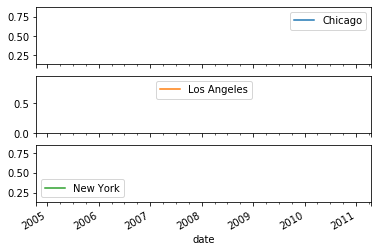

In [20]:
# Set the frequency to calendar daily
co = co.asfreq('D')
display(co.head())

# Plot the data
co.plot(subplots=True)


,Chicago,Los Angeles,New York
date,,,
2005-01-31,0.850000,0.800498,0.799479
2005-02-28,0.575000,0.397600,0.780729
2005-03-31,0.412500,0.432972,0.740672
2005-04-30,0.502083,0.291305,0.716382
2005-05-31,0.520834,0.292753,0.615625


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8850CDD30>,
      dtype=object)

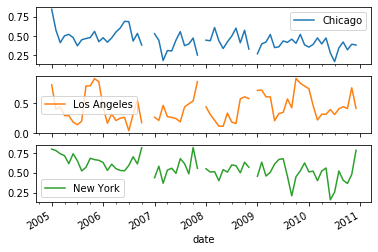

In [21]:
# Set frequency to monthly
co = co.asfreq('M')
display(co.head())

# Plot the data
co.plot(subplots=True)


### Shifting stock prices across time

The first method to manipulate time series that you saw in the video was `.shift()`, which allows you shift all values in a `Series` or `DataFrame` by a number of periods to a different time along the `DateTimeIndex`.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8839C8358>,
      dtype=object)

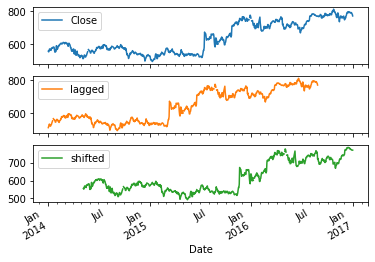

In [23]:
# Import data here
google = pd.read_csv('google.csv', index_col='Date', parse_dates=['Date'])

# Use .asfreq() to set the frequency of google to business daily.
google = google.asfreq('B')

# Add new columns lagged and shifted to google that contain the Close 
# shifted by 90 business days into past and future, respectively.
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot(subplots=True)

### Calculating stock price changes

You have learned in the video how to calculate returns using current and shifted prices as input. Now you'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function `.diff()`.

In [27]:
yahoo = pd.read_csv('yahoo.csv', index_col='date', parse_dates=['date'])

# Create a new column called shifted_30 that contains the 'price' shifted by 30 business days into the future.
yahoo['shifted_30'] = yahoo.price.shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo['price'].sub(yahoo['shifted_30'])

# Get the 30-day price difference
# Apply .diff(), setting periods to 30, and assign the result to a new column, 'diff_30'
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspect the last five rows of price
display(yahoo.tail())

# Subtract diff_30 from change_30 using the .sub() method and print the .value_counts() of the result to show both columns are equal.
print(yahoo['diff_30'].sub(yahoo['change_30']).value_counts())


,price,shifted_30,change_30,diff_30
date,,,,
2015-12-25,NaN,32.19,NaN,NaN
2015-12-28,33.60,32.94,0.66,0.66
2015-12-29,34.04,32.86,1.18,1.18
2015-12-30,33.37,32.98,0.39,0.39
2015-12-31,33.26,32.62,0.64,0.64


0.0    703
dtype: int64


### Plotting multi-period returns

The last time series method you have learned about in the video was `.pct_change()`. Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We'll be using Google stock prices from 2014-2016.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C886FEBEB8>,
      dtype=object)

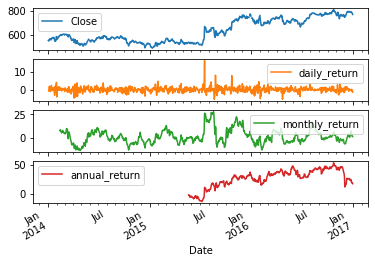

In [31]:
google.drop(['shifted', 'lagged'], axis=1, inplace=True)
# Create the columns 'daily_return', 'monthly_return', and 'annual_return' 
# that contain the pct_change() of 'Close' for 1, 30 and 360 calendar days, respectively, 
# and multiply each by 100.

# Create daily_return
google['daily_return'] = google.Close.pct_change().mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods=30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods=360).mul(100)

# Plot the result
google.plot(subplots=True)